In [ ]:
#Q1 Object-Oriented Programming: Neuron Hierarchy
# This program models different types of neurons using OOP principles.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# readng pic path
img = mpimg.imread('diagram-class hierarchy.jpg')

# showing pic in code
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')  # אם לא רוצים שתהיה תצוגה של הצירים
plt.show()

# General Neuron class
class GeneralNeuron:
    def __init__(self, firing_rate=0):
        self.firing_rate = firing_rate  # All neurons have a firing rate

    def activate(self, stimulus_strength):
        # Simulate firing rate calculation based on stimulus
        self.firing_rate = stimulus_strength * 0.5
        return f"Activated with firing rate: {self.firing_rate}"

# Sensory Neuron class inheriting from General Neuron
class SensoryNeuron(GeneralNeuron):
    def __init__(self, receptor_type, firing_rate=0):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type  # Specific to sensory neurons

    def sense_stimulus(self, stimulus_type, stimulus_strength):
        # Check if the stimulus matches the receptor type
        if stimulus_type == self.receptor_type:
            return self.activate(stimulus_strength)
        else:
            return f"No response: incompatible stimulus type ({stimulus_type})"

# Motor Neuron class inheriting from General Neuron
class MotorNeuron(GeneralNeuron):
    def __init__(self, target_muscle, firing_rate=0):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle  # Specific to motor neurons

    def control_muscle(self):
        # Control the target muscle based on firing rate
        if self.firing_rate > 0:
            return f"Controlling {self.target_muscle} with firing rate {self.firing_rate}"
        else:
            return f"No activation in {self.target_muscle}"

# Specific sensory neurons
class Photoreceptor(SensoryNeuron):
    def __init__(self):
        super().__init__(receptor_type="light")

    def detect_light(self, light_intensity):
        # Unique behavior: increase firing rate with light intensity
        return self.sense_stimulus("light", light_intensity)

class Mechanoreceptor(SensoryNeuron):
    def __init__(self):
        super().__init__(receptor_type="pressure")

    def detect_pressure(self, pressure_level):
        # Unique behavior: respond to pressure strength
        return self.sense_stimulus("pressure", pressure_level)

# Specific motor neurons
class AlphaMotorNeuron(MotorNeuron):
    def __init__(self):
        super().__init__(target_muscle="skeletal muscle")

    def trigger_movement(self):
        # Simulate strong, rapid muscle contraction
        return self.control_muscle()

class GammaMotorNeuron(MotorNeuron):
    def __init__(self):
        super().__init__(target_muscle="muscle spindle")

    def adjust_tension(self):
        # Simulate gradual muscle spindle tension adjustment
        return self.control_muscle()


In [ ]:
#Q2
import numpy as np
import matplotlib.pyplot as plt

# sampling signal function
def downsample_signal(signal, sampling_interval):
    # finding max and min
    max_indices = np.argwhere(np.r_[True, signal[1:] > signal[:-1]] & np.r_[signal[:-1] > signal[1:], True]).flatten()
    min_indices = np.argwhere(np.r_[True, signal[1:] < signal[:-1]] & np.r_[signal[:-1] < signal[1:], True]).flatten()
    
    # sampling
    downsampled_indices = np.arange(0, len(signal), sampling_interval)
    
    # שילוב עם נקודות קיצון
    all_indices = np.unique(np.concatenate((downsampled_indices, max_indices, min_indices)))
    downsampled_signal = signal[all_indices]
    
    return all_indices, downsampled_signal

# creating sinus signal
t = np.arange(0, 2, 0.01)  # amplitude 2 - 2 seconds
frequency = 5  #(5Hz) 5 cycles in 1 sec
original_signal = np.sin(2 * np.pi * frequency * t)

# sampling
indices, downsampled_signal = downsample_signal(original_signal, 5)

# showing graph
plt.figure(figsize=(10, 6))
plt.plot(t, original_signal, label="Original Signal", color="blue")
plt.plot(t[indices], downsampled_signal, "o-", label="Downsampled Signal", color="red")
plt.title("Signal Downsampling with Max and Min Preservation")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type  OpSys  \
0            128GB SSD       Intel  Iris Plus Graphics 640  macOS

C:\Users\שחפולה\AppData\Local\Temp\ipykernel_25868\1828178163.py:95: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Count', y='Company', data=company_sales, palette='cool')


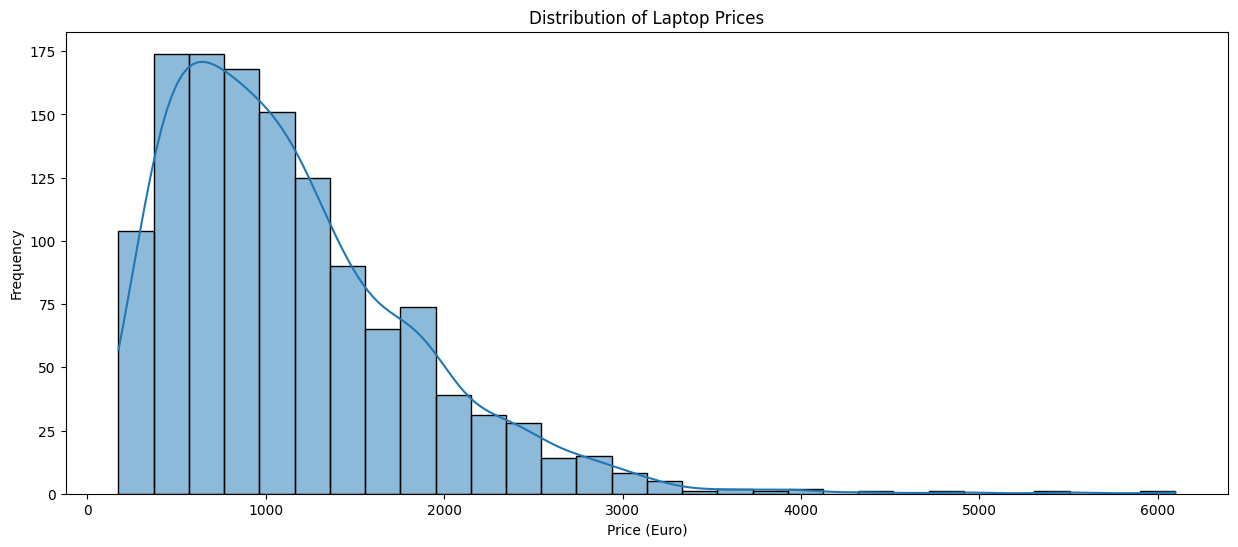

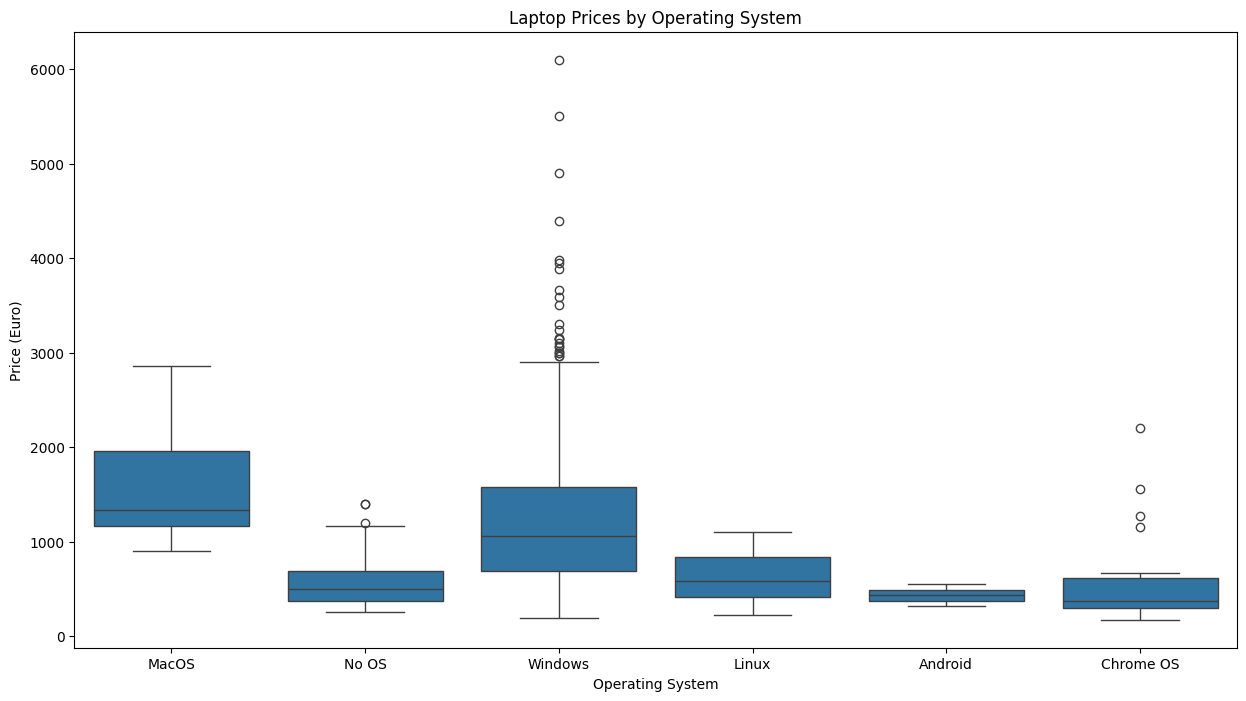

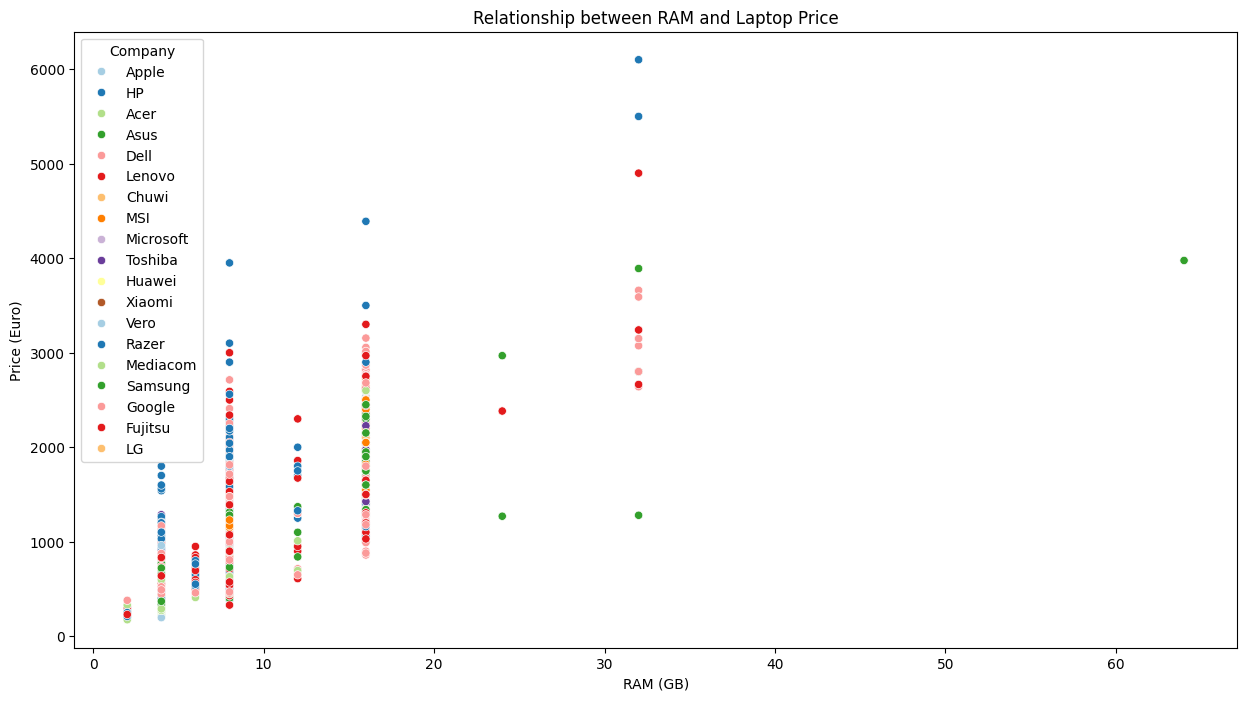

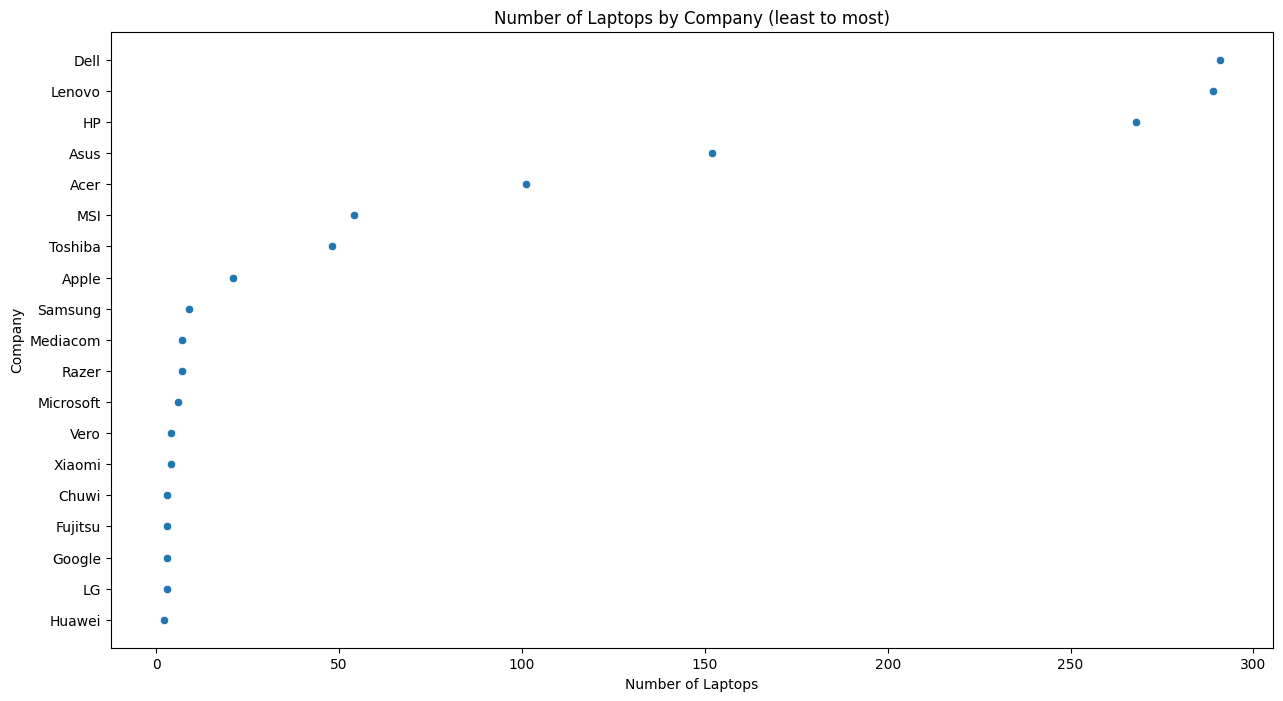

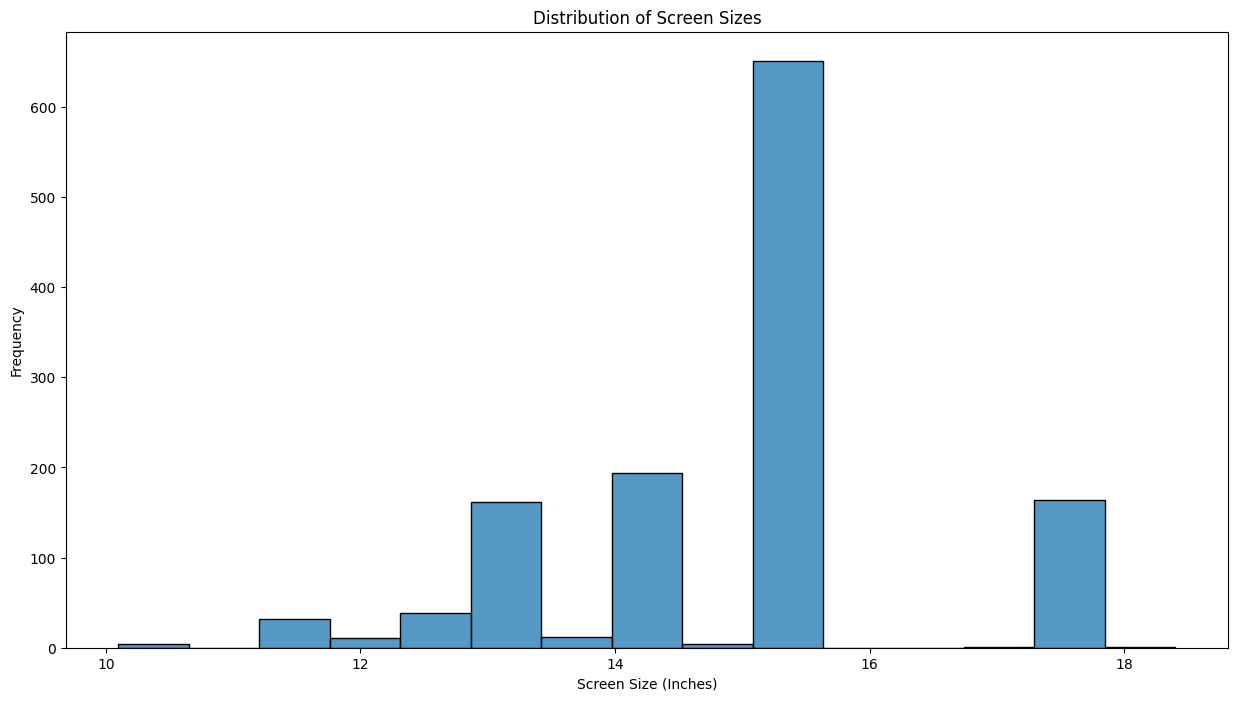

In [63]:
#Q3:
# Laptop Price Analysis

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'laptop_price - dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows for inspection
print(data.head())

# Task 1: Plot the price of all laptops
plt.figure(figsize=(15, 6))
sns.histplot(data['Price (Euro)'], bins=30, kde=True)
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price (Euro)')
plt.ylabel('Frequency')
#plt.show(


# Task 2: Find the most expensive laptop company on average
# Group by company and calculate the average price for each company
if 'Company' in data.columns and 'Price (Euro)' in data.columns:
    average_price_per_company = data.groupby('Company')['Price (Euro)'].mean()
    print(average_price_per_company)

    # Find the company with the most expensive laptops on average
    most_expensive_company = average_price_per_company.idxmax()
    highest_average_price = average_price_per_company.max()

    print(f"The company with the most expensive laptops on average is {most_expensive_company} with an average price of {highest_average_price:.2f} Euro.")
else:
    print("One of the required columns is missing. Please check your dataset.")



# Task 3: Standardize Operating Systems
# Clean the 'OpSys' column
def clean_os(os_name):
    os_name = os_name.lower()
    if 'windows' in os_name:
        return 'Windows'
    elif 'mac' in os_name:
        return 'MacOS'
    elif 'linux' in os_name or 'ubuntu' in os_name:
        return 'Linux'
    elif 'chrome' in os_name:
        return 'Chrome OS'
    elif 'android' in os_name:
        return 'Android'
    elif 'no os' in os_name:
        return 'No OS'
    else:
        return 'Other'

data['OpSys'] = data['OpSys'].apply(clean_os)

# Find unique operating systems
unique_os = data['OpSys'].unique()
print(f"\nUnique Operating Systems: {unique_os}")

# Task 4: Plot price distribution by OS
plt.figure(figsize=(15, 8))
sns.boxplot(x='OpSys', y='Price (Euro)', data=data)
plt.title('Laptop Prices by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Price (Euro)')
#plt.show()

# Task 5: RAM vs Price Analysis
plt.figure(figsize=(15, 8))
sns.scatterplot(x='RAM (GB)', y='Price (Euro)', data=data, hue='Company', palette='Paired') # this is the best color palette i could find.. i wanted something that will be easier to tell apart
plt.title('Relationship between RAM and Laptop Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
#plt.show()

# Task 6: Extract Storage Type
data['Storage Type'] = data['Memory'].apply(lambda x: x.split()[-1])
print(data[['Memory', 'Storage Type']].head())

# Bonus Question Ideas:
# 1. Laptops Count by Company Plot
# 2. Which screen size is most common among laptops?

# Bonus Question 1: laptot count plot
company_sales = data['Company'].value_counts().reset_index()
company_sales.columns = ['Company', 'Count']

plt.figure(figsize=(15, 8))
sns.scatterplot(x='Count', y='Company', data=company_sales, palette='cool')
plt.title('Number of Laptops by Company (least to most)')
plt.xlabel('Number of Laptops')
plt.ylabel('Company')
plt.show()

# Bonus Question 2: Screen Size Distribution
plt.figure(figsize=(15, 8))
sns.histplot(data['Inches'], bins=15)
plt.title('Distribution of Screen Sizes')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Frequency')
plt.show()
